# Telecom Churn Prediction

This project aims to analyze the data and identify if there are any driving factors behind the Telecom Churn. The statistical model will be constructed to predict churn afterwards. 
The given data set consists of 71,047 rows & containing a total of 59 variables (including a
variable named “CHURN” meaning whether the customer had left the company two months
after observation). During the data preprocessing stage, some variables have been dropped due to
irrelevance to the data, insignificance and high number of missing values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from  sklearn.metrics import roc_auc_score, roc_curve,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from statsmodels.discrete.discrete_model import Logit
from sklearn.preprocessing import normalize
import scikitplot as skplt

In [2]:
data=pd.read_csv('Data.csv')

In [3]:
data.head()

,customer,calibrat,churn,revenue,mou,recchrge,directas,overage,roam,changem,...,retaccpt,newcelly,newcelln,refer,incmiss,income,mcycle,setprcm,setprc,retcall
0,1000002,0,0,57.4925,482.75,37.425,0.2475,22.75,0.0,532.25,...,0,0,1,0,0,5,0,0,149.990000,0
1,1000006,0,0,82.2750,1312.25,75.000,1.2375,0.00,0.0,156.75,...,0,1,0,0,0,6,0,0,9.989998,0
2,1000010,0,0,31.6625,25.50,29.990,0.2475,0.00,0.0,59.50,...,0,0,1,0,0,9,0,0,29.989990,0
3,1000011,0,0,62.1275,97.50,65.985,2.4750,0.00,0.0,23.50,...,0,1,0,0,0,6,0,0,29.989990,0
4,1000014,0,0,25.2250,2.50,25.000,0.0000,0.00,0.0,-2.50,...,0,1,0,0,0,7,0,0,29.989990,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71047 entries, 0 to 71046
Data columns (total 69 columns):
customer    71047 non-null int64
calibrat    71047 non-null int64
churn       71047 non-null int64
revenue     70831 non-null float64
mou         70831 non-null float64
recchrge    70831 non-null float64
directas    70831 non-null float64
overage     70831 non-null float64
roam        70831 non-null float64
changem     70545 non-null float64
changer     70545 non-null float64
dropvce     71047 non-null float64
blckvce     71047 non-null float64
unansvce    71047 non-null float64
custcare    71047 non-null float64
threeway    71047 non-null float64
mourec      71047 non-null float64
outcalls    71047 non-null float64
incalls     71047 non-null float64
peakvce     71047 non-null float64
opeakvce    71047 non-null float64
dropblk     71047 non-null float64
callfwdv    71047 non-null float64
callwait    71047 non-null float64
months      71047 non-null int64
uniqsubs    71047 non-nu

In [5]:
data.nunique()

customer    71047
calibrat        2
churn           2
revenue     31115
mou          8933
recchrge     6906
directas      157
overage      2328
roam         4353
changem      6847
changer     26264
dropvce       304
blckvce       401
unansvce      916
custcare      198
threeway       88
mourec      41634
outcalls      841
incalls       500
peakvce      2002
opeakvce     1817
dropblk       481
callfwdv       39
callwait      246
months         56
uniqsubs       15
actvsubs       12
phones         24
models         14
eqpdays      1496
            ...  
webcap          2
truck           2
rv              2
occprof         2
occcler         2
occcrft         2
occstud         2
occhmkr         2
occret          2
occself         2
ownrent         2
marryun         2
marryyes        2
mailord         2
mailres         2
mailflag        2
travel          2
pcown           2
creditcd        2
retcalls        5
retaccpt        5
newcelly        2
newcelln        2
refer          13
incmiss   

For dimension-reduction and computation-accelaration purposes, I will try to identify the multicollinearity and get rid of highly correlated variables. This will also reduce the risk of overfitting in the training set. The "high-correlation" threshold will be set up as 0.75. Variables will be treated and removed on individual basis. 

In [5]:
#the whole correlation matrix, but is too big, need to get only correlated pairs
corr_matrix = data.corr().abs().round(2)
print(corr_matrix)

          customer  calibrat  churn  revenue   mou  recchrge  directas  \
customer      1.00      0.02   0.04     0.00  0.09      0.05      0.00   
calibrat      0.02      1.00   0.53     0.01  0.03      0.03      0.01   
churn         0.04      0.53   1.00     0.01  0.05      0.06      0.02   
revenue       0.00      0.01   0.01     1.00  0.71      0.63      0.41   
mou           0.09      0.03   0.05     0.71  1.00      0.58      0.39   
recchrge      0.05      0.03   0.06     0.63  0.58      1.00      0.31   
directas      0.00      0.01   0.02     0.41  0.39      0.31      1.00   
overage       0.00      0.01   0.01     0.79  0.57      0.20      0.28   
roam          0.00      0.00   0.01     0.29  0.11      0.08      0.07   
changem       0.01      0.02   0.03     0.02  0.04      0.01      0.02   
changer       0.01      0.01   0.01     0.02  0.03      0.02      0.02   
dropvce       0.06      0.01   0.01     0.44  0.60      0.35      0.26   
blckvce       0.04      0.00   0.01   

In [8]:
#Option 1: unstacking the dataframe to get highly correlated pairs
corr_matrix.unstack().sort_values().drop_duplicates().sort_values(ascending=False)[:16]

customer  customer    1.00
mailord   mailres     0.97
retcalls  retcall     0.96
phones    models      0.89
mou       mourec      0.83
incmiss   creditcd    0.82
          ownrent     0.81
creditcd  ownrent     0.80
revenue   overage     0.79
mou       opeakvce    0.77
peakvce   mourec      0.75
incmiss   age1        0.74
retcalls  retaccpt    0.73
dropblk   dropvce     0.72
revenue   mou         0.71
outcalls  mou         0.70
dtype: float64

In [9]:
#Option 2: Converting to numpy array using np.ones() and np.triu() and then unstacking, getting most correlated pairs
cor = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
print(cor[cor>=0.75])

mailord   mailres     0.97
retcalls  retcall     0.96
phones    models      0.89
mou       mourec      0.83
creditcd  incmiss     0.82
blckvce   dropblk     0.81
ownrent   incmiss     0.81
          creditcd    0.80
incmiss   income      0.80
revenue   overage     0.79
uniqsubs  actvsubs    0.77
mou       opeakvce    0.77
          peakvce     0.77
mourec    peakvce     0.75
customer  months      0.75
outcalls  opeakvce    0.75
dtype: float64


In [10]:
#dropping highly-correlated (insignificant) variables
data=data.drop(["customer","income","retcall","phones","mourec","incmiss","blckvce","ownrent","actvsubs","peakvce"], axis=1)

# Removing insignificant variables as revealed by Decision Tree/Random Forest Feature Importance tool

In [25]:
#removing insignificant variables as defined by decision tree/random forest feature importances
data=data.drop(["travel","mailflag","mailres","marryyes","occself"], axis=1)

In [26]:
#removing insignificant variables as defined by decision tree feature importance
data=data.drop(["occret","occhmkr","occstud","occcrft","age2","occprof","rv","truck","credita","directas","prizmtwn","occcler"], axis=1)

In [11]:
corr_matrix = data.corr().abs().round(2)
cor = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
print(cor[cor>=0.75])

mailord   mailres     0.97
revenue   overage     0.79
mou       opeakvce    0.77
outcalls  opeakvce    0.75
dtype: float64


Some insignificant variables are kept in the dataset as it is assumed they can provide useful information afterwards. 

# Missing Values

In [12]:
data.isnull().sum()

calibrat       0
churn          0
revenue      216
mou          216
recchrge     216
directas     216
overage      216
roam         216
changem      502
changer      502
dropvce        0
unansvce       0
custcare       0
threeway       0
outcalls       0
incalls        0
opeakvce       0
dropblk        0
callfwdv       0
callwait       0
months         0
uniqsubs       0
models         1
eqpdays        1
age1        1244
age2        1244
children       0
credita        0
creditaa       0
prizmrur       0
prizmub        0
prizmtwn       0
refurb         0
webcap         0
truck          0
rv             0
occprof        0
occcler        0
occcrft        0
occstud        0
occhmkr        0
occret         0
occself        0
marryun        0
marryyes       0
mailord        0
mailres        0
mailflag       0
travel         0
pcown          0
creditcd       0
retcalls       0
retaccpt       0
newcelly       0
newcelln       0
refer          0
mcycle         0
setprcm        0
setprc        

In [13]:
data=data.dropna()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69309 entries, 0 to 71042
Data columns (total 59 columns):
calibrat    69309 non-null int64
churn       69309 non-null int64
revenue     69309 non-null float64
mou         69309 non-null float64
recchrge    69309 non-null float64
directas    69309 non-null float64
overage     69309 non-null float64
roam        69309 non-null float64
changem     69309 non-null float64
changer     69309 non-null float64
dropvce     69309 non-null float64
unansvce    69309 non-null float64
custcare    69309 non-null float64
threeway    69309 non-null float64
outcalls    69309 non-null float64
incalls     69309 non-null float64
opeakvce    69309 non-null float64
dropblk     69309 non-null float64
callfwdv    69309 non-null float64
callwait    69309 non-null float64
months      69309 non-null int64
uniqsubs    69309 non-null int64
models      69309 non-null float64
eqpdays     69309 non-null float64
age1        69309 non-null float64
age2        69309 non-nu

# Outlier Detection

In [15]:
#Selecting only continuous variables
data_num=data.select_dtypes(exclude="int64")

In [16]:
data_num.head()

,revenue,mou,recchrge,directas,overage,roam,changem,changer,dropvce,unansvce,...,incalls,opeakvce,dropblk,callfwdv,callwait,models,eqpdays,age1,age2,setprc
0,57.4925,482.75,37.425,0.2475,22.75,0.0,532.25,50.9875,8.333333,61.333330,...,6.333333,157.000000,9.333333,0.0,5.666667,6.0,240.0,30.0,0.0,149.990000
1,82.2750,1312.25,75.000,1.2375,0.00,0.0,156.75,8.1450,52.000000,76.000000,...,147.000000,303.666700,59.666670,0.0,22.666670,4.0,458.0,30.0,0.0,9.989998
2,31.6625,25.50,29.990,0.2475,0.00,0.0,59.50,4.0275,0.000000,2.333333,...,0.000000,1.666667,1.000000,0.0,0.000000,2.0,601.0,52.0,58.0,29.989990
3,62.1275,97.50,65.985,2.4750,0.00,0.0,23.50,6.8225,0.000000,4.000000,...,0.000000,7.333333,0.333333,0.0,0.000000,3.0,464.0,46.0,46.0,29.989990
4,25.2250,2.50,25.000,0.0000,0.00,0.0,-2.50,-0.2250,0.000000,0.333333,...,0.000000,0.666667,0.000000,0.0,0.000000,2.0,354.0,0.0,0.0,29.989990


In [17]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69309 entries, 0 to 71042
Data columns (total 23 columns):
revenue     69309 non-null float64
mou         69309 non-null float64
recchrge    69309 non-null float64
directas    69309 non-null float64
overage     69309 non-null float64
roam        69309 non-null float64
changem     69309 non-null float64
changer     69309 non-null float64
dropvce     69309 non-null float64
unansvce    69309 non-null float64
custcare    69309 non-null float64
threeway    69309 non-null float64
outcalls    69309 non-null float64
incalls     69309 non-null float64
opeakvce    69309 non-null float64
dropblk     69309 non-null float64
callfwdv    69309 non-null float64
callwait    69309 non-null float64
models      69309 non-null float64
eqpdays     69309 non-null float64
age1        69309 non-null float64
age2        69309 non-null float64
setprc      69309 non-null float64
dtypes: float64(23)
memory usage: 12.7 MB


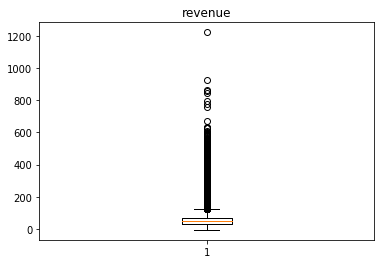

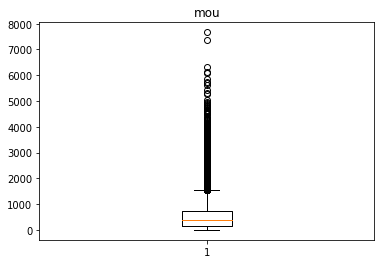

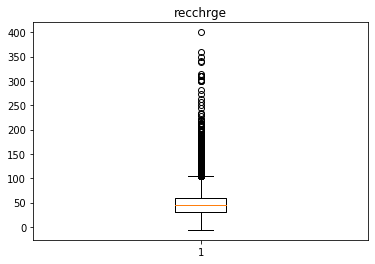

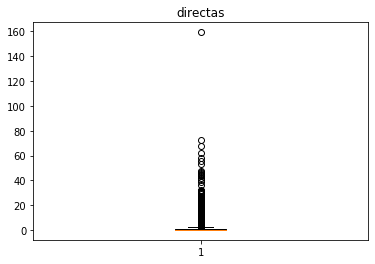

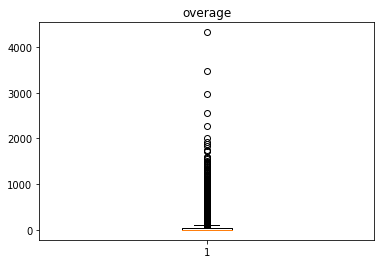

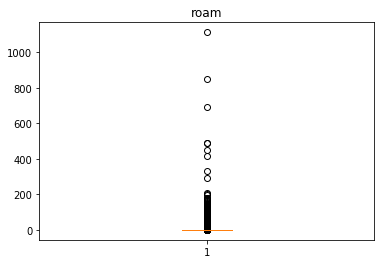

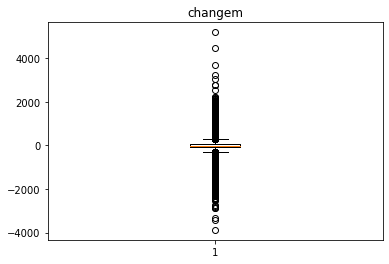

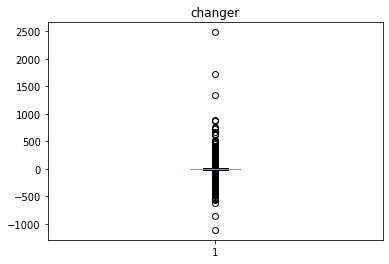

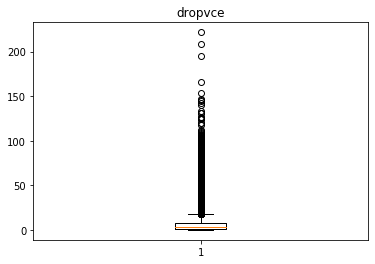

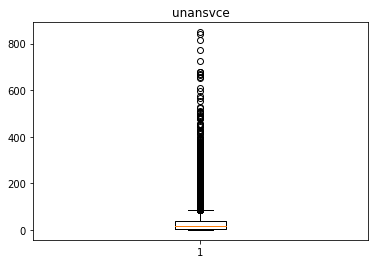

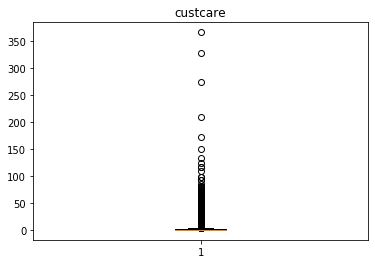

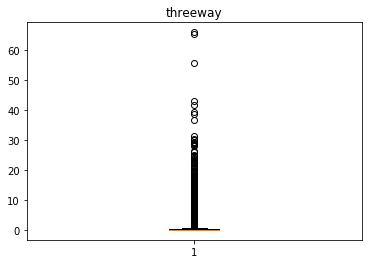

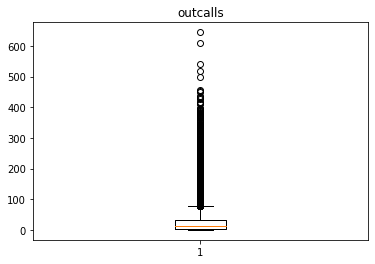

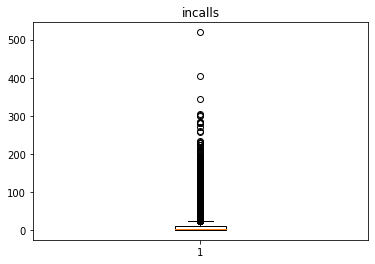

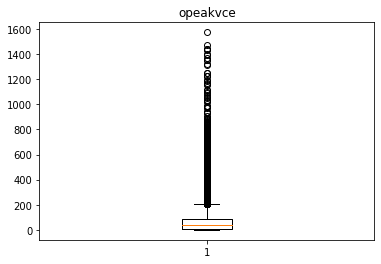

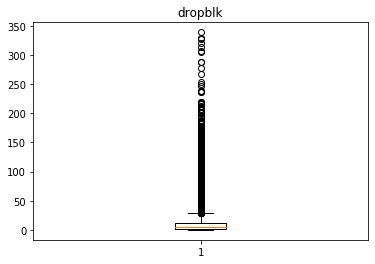

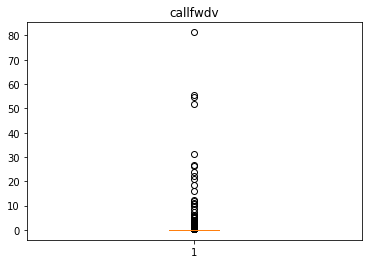

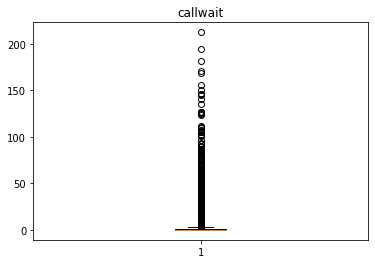

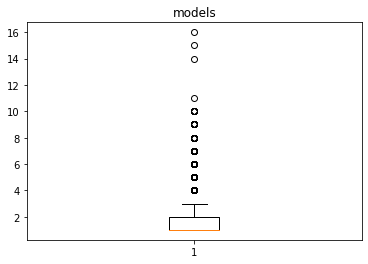

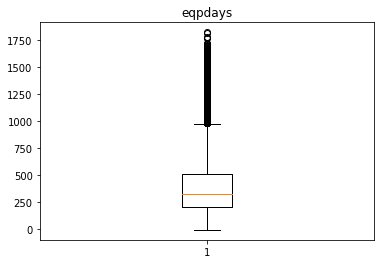

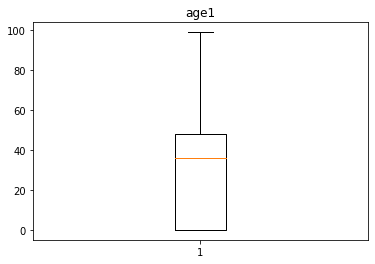

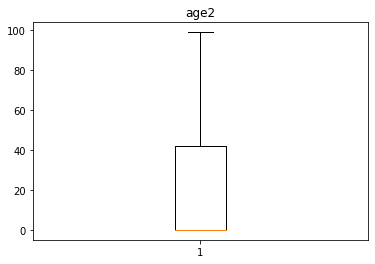

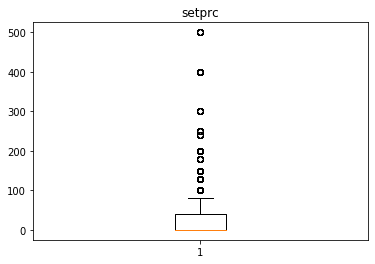

In [18]:
for i in data_num.columns:
    plt.boxplot(data_num[i])
    plt.title(i)
    plt.show();

Outlier Detection #1: Using IQR

In [19]:
#Identifying outliers using IQR
Q1,Q3=data_num.quantile(0.25),data_num.quantile(0.75)
iqr=Q3-Q1
lower=Q1-1.5*iqr
upper=Q3+1.5*iqr

In [20]:
print(lower)
print("\n")
print(upper)

revenue     -22.157500
mou        -683.500000
recchrge    -14.985000
directas     -1.485000
overage     -60.750000
roam         -0.386250
changem    -305.750000
changer     -19.972500
dropvce      -9.833334
unansvce    -41.666673
custcare     -2.500000
threeway     -0.500000
outcalls    -42.166673
incalls     -13.999999
opeakvce   -105.499990
dropblk     -14.000005
callfwdv      0.000000
callwait     -2.000000
models       -0.500000
eqpdays    -261.000000
age1        -72.000000
age2        -63.000000
setprc      -59.984985
dtype: float64


revenue      126.642500
mou         1562.500000
recchrge     104.975000
directas       2.475000
overage      101.250000
roam           0.643750
changem      288.250000
changer       14.527500
dropvce       18.166667
unansvce      83.666676
custcare       4.166667
threeway       0.833333
outcalls      79.166676
incalls       23.333332
opeakvce     205.166650
dropblk       28.666675
callfwdv       0.000000
callwait       3.333333
models         3.50000

In [21]:
outliers_lower=data_num[data_num<lower].notnull().sum()
outliers_upper=data_num[data_num>upper].notnull().sum()
print(outliers_lower)
print("\n")
print(outliers_upper)

revenue        0
mou            0
recchrge       0
directas       0
overage        0
roam           0
changem     4711
changer     9299
dropvce        0
unansvce       0
custcare       0
threeway       0
outcalls       0
incalls        0
opeakvce       0
dropblk        0
callfwdv       0
callwait       0
models         0
eqpdays        0
age1           0
age2           0
setprc         0
dtype: int64


revenue      4094
mou          3561
recchrge     1340
directas     7437
overage      8041
roam        12814
changem      4560
changer      8800
dropvce      5038
unansvce     4786
custcare     9175
threeway     6246
outcalls     4695
incalls      6654
opeakvce     4922
dropblk      5134
callfwdv      308
callwait    10163
models       2759
eqpdays      1932
age1            0
age2            0
setprc      12110
dtype: int64


Quite many potential outliers were found according to IQR rule. Let is check another option of detecting outliers - with standard deviation (assuming that the distribution is normal).

In [22]:
#OPTION 2: Standard deviation rule
mean,std_dev = np.mean(data_num),np.std(data_num)
#Let's define upper and lower values, and we want to detect values out of that range
##99.7% of data are within 3 std dev of the mean
low, up = mean - 3*std_dev, mean + 3*std_dev
print(low)
print("\n")
print(up)

revenue      -73.432441
mou        -1060.977816
recchrge     -24.630800
directas      -5.676753
overage     -247.705737
roam         -26.004486
changem     -772.591400
changer     -117.058604
dropvce      -20.984967
unansvce     -88.318915
custcare     -13.681074
threeway      -3.194084
outcalls     -79.663986
incalls      -41.215369
opeakvce    -212.123034
dropblk      -35.727458
callfwdv      -1.649290
callwait     -14.844231
models        -1.163833
eqpdays     -378.353482
age1         -34.845878
age2         -50.577740
setprc      -135.175735
dtype: float64


revenue      190.903341
mou         2111.113167
recchrge     118.387188
directas       7.457650
overage      327.360231
roam          28.427332
changem      750.718556
changer      114.683684
dropvce       33.008033
unansvce     145.078845
custcare      17.422945
threeway       3.793919
outcalls     130.448482
incalls       57.549399
opeakvce     347.954965
dropblk       56.015578
callfwdv       1.672010
callwait      18.547309

In [23]:
#Finding columns which have outliers
outliers_low=data_num[data_num<low].notnull().sum()
outliers_up=data_num[data_num>up].notnull().sum()
print(outliers_low)
print("\n")
print(outliers_up)

revenue       0
mou           0
recchrge      0
directas      0
overage       0
roam          0
changem     833
changer     503
dropvce       0
unansvce      0
custcare      0
threeway      0
outcalls      0
incalls       0
opeakvce      0
dropblk       0
callfwdv      0
callwait      0
models        0
eqpdays       0
age1          0
age2          0
setprc        0
dtype: int64


revenue     1212
mou         1257
recchrge     737
directas    1126
overage     1230
roam         477
changem      656
changer      731
dropvce     1320
unansvce    1292
custcare    1105
threeway     773
outcalls    1344
incalls     1362
opeakvce    1390
dropblk     1219
callfwdv      66
callwait    1064
models       992
eqpdays      725
age1           4
age2          40
setprc       131
dtype: int64


The second option yielded less outliers than the previous method (IQR).
As removing some outliers results in emergence of new ones (outliers for one variable are not outliers for others) and given that their number is insignificant in proportion to the whole dataset, the decision was to keep them in the dataset.




# Exploratory Analysis

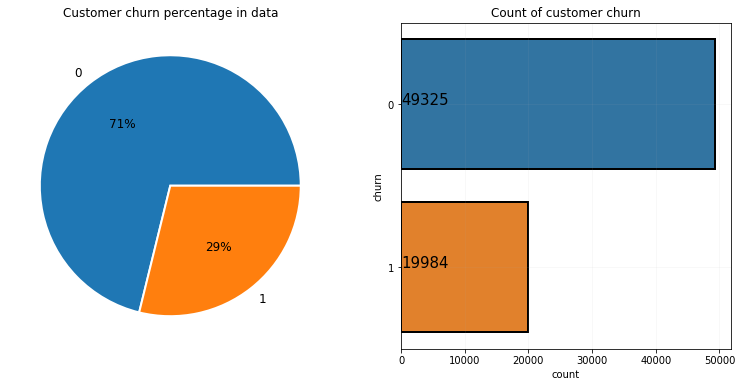

In [24]:
plt.figure(figsize=(13,6))
plt.subplot(121)
data["churn"].value_counts().plot.pie(autopct  = "%1.0f%%",
                                        fontsize = 12,
                                        wedgeprops = {"linewidth" : 2,
                                                      "edgecolor" : "w"},
                                       )
plt.title("Customer churn percentage in data")
plt.ylabel("")

plt.subplot(122)
ax = sns.countplot(y = data["churn"],linewidth = 2,
                   edgecolor = "k"*data["churn"].nunique())
for i,j in enumerate(data["churn"].value_counts().values) : 
    ax.text(.1,i,j,fontsize = 15,color = "k")
plt.title("Count of customer churn")
plt.grid(True,alpha = .1)
    
plt.show()

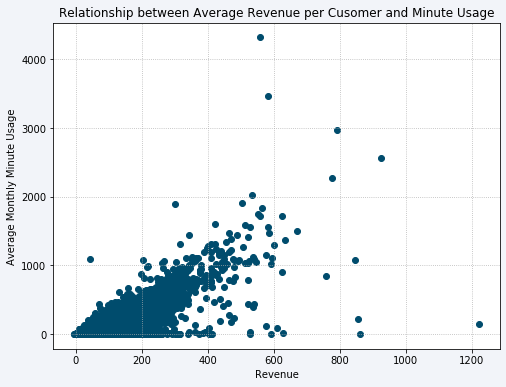

In [25]:
plt.figure(figsize=(8,6), facecolor="#f2f4f9") #making the plot bigger
#draw plot
plt.scatter(data.revenue,
            data.overage,
            color="#004c6d")
#giving titles to axes
plt.title("Relationship between Average Revenue per Cusomer and Minute Usage")
plt.xlabel("Revenue")
plt.ylabel("Average Monthly Minute Usage")
plt.grid(b=True,
         linestyle=':' #giving line style to grid lines
)
plt.show()

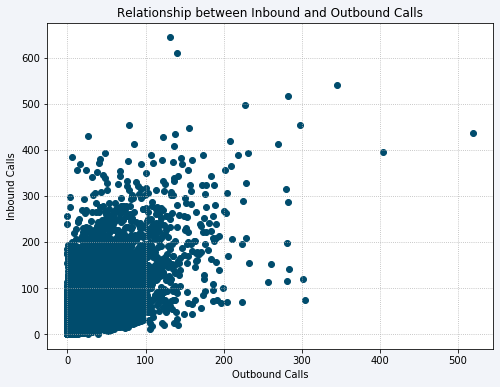

In [26]:
plt.figure(figsize=(8,6), facecolor="#f2f4f9") #making the plot bigger
#draw plot
plt.scatter(data.incalls,
            data.outcalls,
            color="#004c6d")
#giving titles to axes
plt.title("Relationship between Inbound and Outbound Calls")
plt.xlabel("Outbound Calls")
plt.ylabel("Inbound Calls")
plt.grid(b=True,
         linestyle=':' #giving line style to grid lines
)
plt.show()

Positive correlation is observed between inbound and outbound calls. 

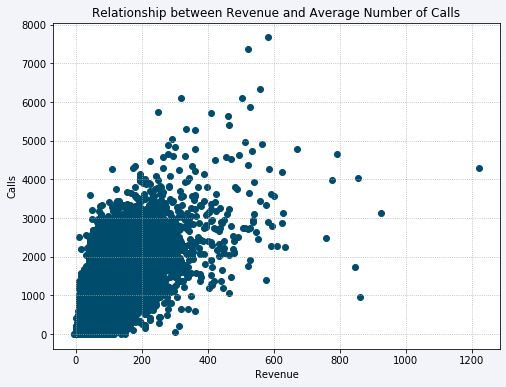

In [27]:
plt.figure(figsize=(8,6), facecolor="#f2f4f9") #making the plot bigger
#draw plot
plt.scatter(data.revenue,
            data.mou,
            color="#004c6d")
#giving titles to axes
plt.title("Relationship between Revenue and Average Number of Calls")
plt.xlabel("Revenue")
plt.ylabel("Calls")
plt.grid(b=True,
         linestyle=':' #giving line style to grid lines
)
plt.show()

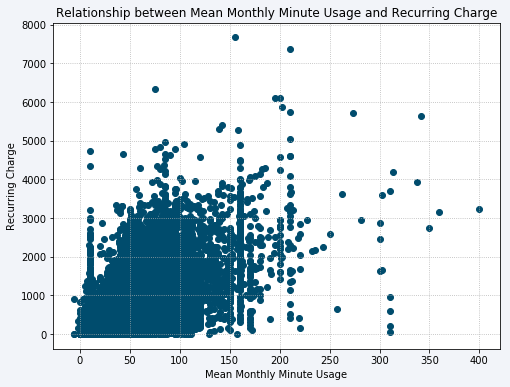

In [90]:
plt.figure(figsize=(8,6), facecolor="#f2f4f9") #making the plot bigger
#draw plot
plt.scatter(data.recchrge,
            data.mou,
            color="#004c6d")
#giving titles to axes
plt.title("Relationship between Mean Monthly Minute Usage and Recurring Charge")
plt.xlabel("Mean Monthly Minute Usage")
plt.ylabel("Recurring Charge")
plt.grid(b=True,
         linestyle=':' #giving line style to grid lines
)
plt.show()

Positive linear relationship can be spotted between the minute usage and recurring charge. It makes sense as the minute usage is increasing in case of increase in account charges.

/Users/vahe_shelunts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


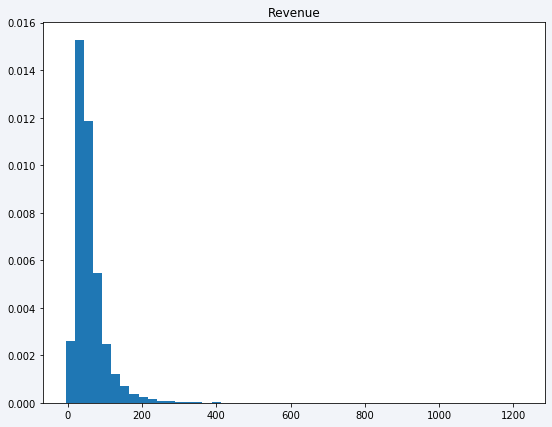

In [28]:
#Looking at the distribution of some continuous variables
plt.figure(figsize=(9,7),facecolor="#f2f4f9")
plt.hist(data.revenue, normed=True,bins=50)
plt.title("Revenue")
plt.show()

/Users/vahe_shelunts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


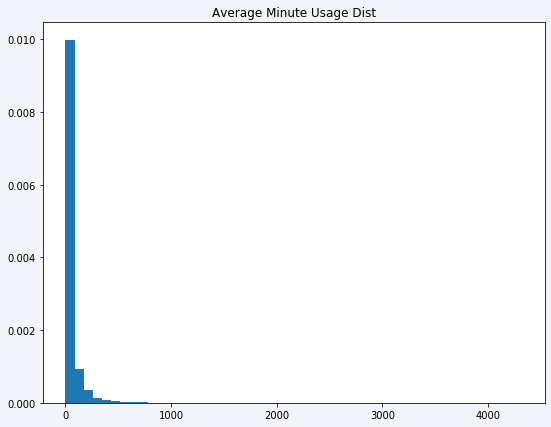

In [29]:
plt.figure(figsize=(9,7),facecolor="#f2f4f9")
plt.hist(data.overage, normed=True,bins=50)
plt.title("Average Minute Usage Dist")
plt.show()

/Users/vahe_shelunts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


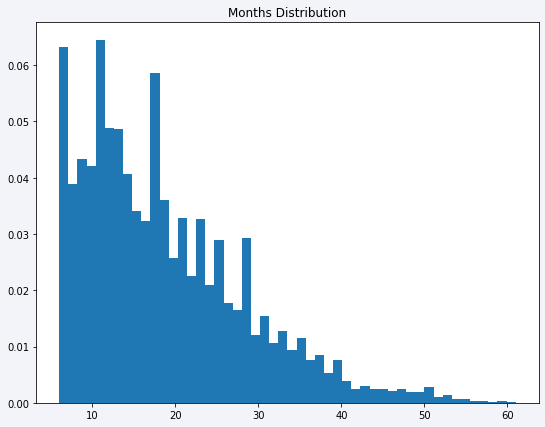

In [30]:
plt.figure(figsize=(9,7),facecolor="#f2f4f9")
plt.hist(data.months, normed=True,bins=50)
plt.title("Months Distribution")
plt.show()

/Users/vahe_shelunts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


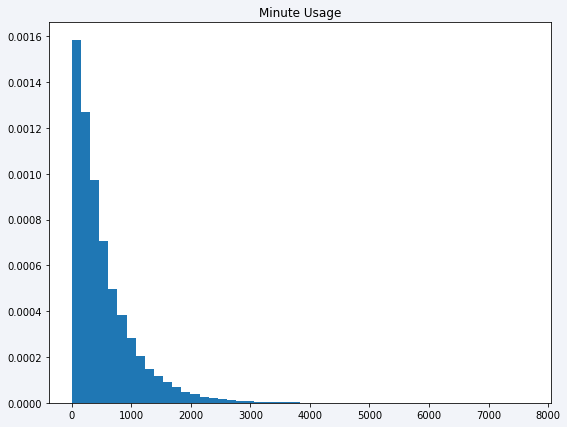

In [31]:
plt.figure(figsize=(9,7),facecolor="#f2f4f9")
plt.hist(data.mou, normed=True,bins=50)
plt.title("Minute Usage")
plt.show()

/Users/vahe_shelunts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


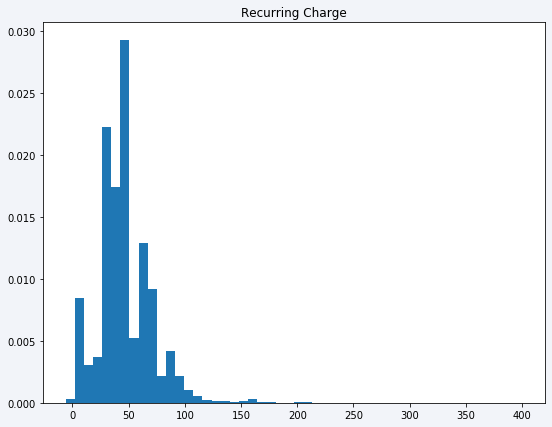

In [35]:
plt.figure(figsize=(9,7),facecolor="#f2f4f9")
plt.hist(data.recchrge, normed=True,bins=50)
plt.title("Recurring Charge")
plt.show()

Some conitnous variables seem to be highly-skewed. The normalization techniques (log and cubic transformation) will be applied to get a more normalized distribution and increase the statistical model performance afterwards.

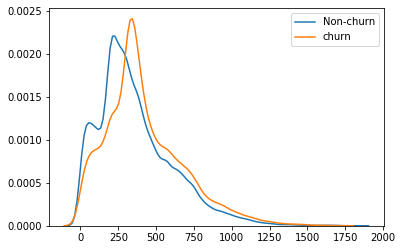

In [32]:
sns.kdeplot(data.eqpdays[data.churn==0],label="Non-churn")
sns.kdeplot(data.eqpdays[data.churn==1], label="churn")
plt.legend()
plt.show()

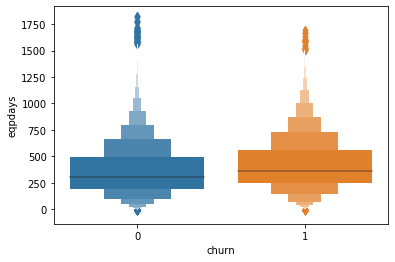

In [33]:
sns.boxenplot(data.churn, data.eqpdays)

We can observe some behavioural pattern difference between churned and not churned customers in terms of equipment usage. Those customers that churned had an older equipment (mobile phone) in comparison to retained customers. This may imply that this is one of the significant variables behind churn.  

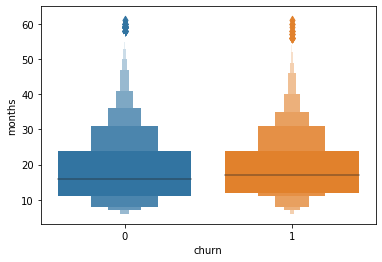

In [34]:
sns.boxenplot(data.churn, data.months)

The same pattern is observed for the "months" variable which indicated the monthly duration of subscription to telecom service. 

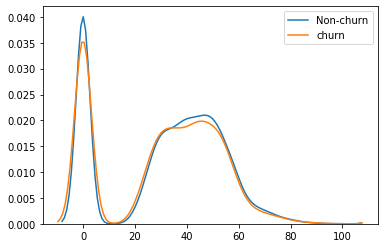

In [36]:
sns.kdeplot(data.age1[data.churn==0],label="Non-churn")
sns.kdeplot(data.age1[data.churn==1], label="churn")
plt.legend()
plt.show()

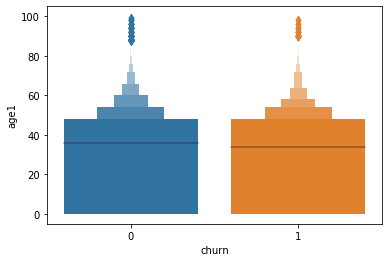

In [37]:
sns.boxenplot(data.churn, data.age1)

The Age variable has a very absurd distribution as many observations appear to have 0 value. This variable will be dropped.

In [39]:
data=data.drop("age1",axis=1)

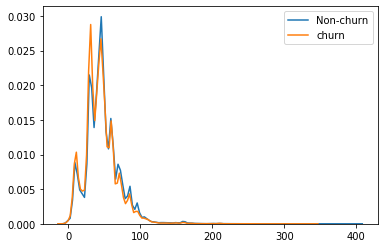

In [40]:
sns.kdeplot(data.recchrge[data.churn==0],label="Non-churn")
sns.kdeplot(data.recchrge[data.churn==1], label="churn")
plt.legend()
plt.show()

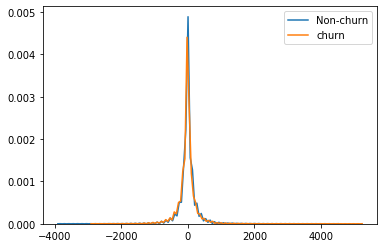

In [41]:
sns.kdeplot(data.changem[data.churn==0],label="Non-churn")
sns.kdeplot(data.changem[data.churn==1], label="churn")
plt.legend()
plt.show()

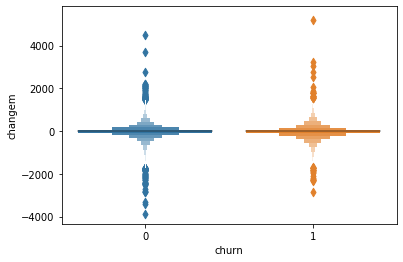

In [42]:
sns.boxenplot(data.churn, data.changem)

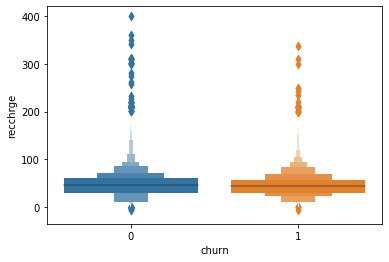

In [43]:
sns.boxenplot(data.churn, data.recchrge)

For the other above-indicated variables, no significant difference is observed between the churned and non-churned segments (in terms of mean values). One of the potentially interesting variables is retaccpt which indicated the number of accepted retention offers by customers. The frequency distribution and pie chart plots will be plotted to get some insights into this variable. 

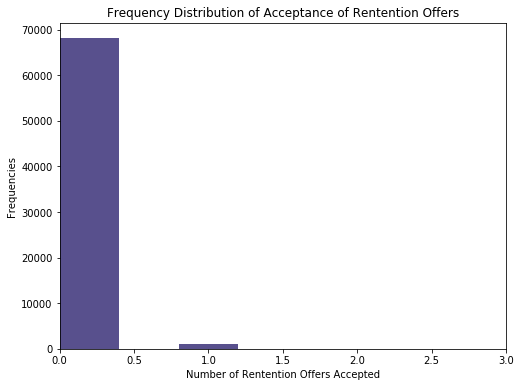

In [44]:
plt.figure(figsize=(8,6))
plt.hist(data.retaccpt,color="#58508d")
plt.xlim(0,3)
plt.title("Frequency Distribution of Acceptance of Rentention Offers")
plt.ylabel("Frequencies")
plt.xlabel("Number of Rentention Offers Accepted")
plt.show()

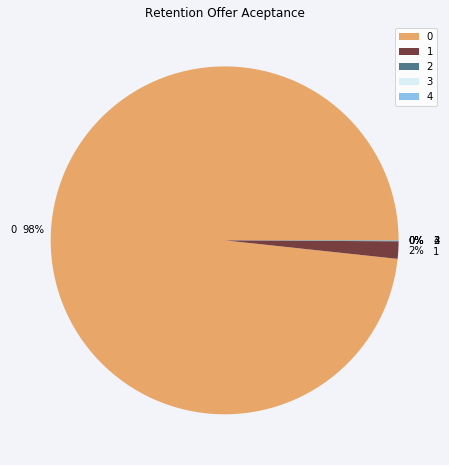

In [45]:
col=["#e8a668","#773f3f","#4f7b8a", "#d9f1f6","#89c1ec"] #define colors for each slice of pie chart
plt.figure(figsize=(8,8),facecolor="#f2f4f9") #change plot size
#draw plot
plt.pie(data.retaccpt.value_counts(),
        labels=data.retaccpt.unique(),
        colors=col,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title("Retention Offer Aceptance") #giving a title
plt.legend() #to create legend so that we can differenciate variables
plt.show()

As we can see, only 2 % of contacted customers accepted the retention offers. This indicated has to be compared with the industry benchmark to assess it. 

# Log Transformation to get normalized distrbution

As indicated previously, all skewed variables are normalized. 

In [46]:
#Making log transformations
data['revenue'] = np.log(data['revenue']+1)
data['mou'] = np.log(data['mou']+1)
data['recchrge'] = np.log(data['recchrge']+1)
data['overage'] = np.log(data['overage']+1)
data['roam'] = np.log(data['roam']+1)
data['months'] = np.log(data['months']+1)
data['eqpdays'] = data.eqpdays**(1/3)
data['dropvce'] = data.dropvce**(1/3)
data['incalls'] = data.incalls**(1/3)
data['outcalls'] = data.outcalls**(1/3)
data['unansvce'] = data.unansvce**(1/3)

/Users/vahe_shelunts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/Users/vahe_shelunts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [47]:
data=data.dropna()

In [48]:
data.isnull().sum()

calibrat    0
churn       0
revenue     0
mou         0
recchrge    0
directas    0
overage     0
roam        0
changem     0
changer     0
dropvce     0
unansvce    0
custcare    0
threeway    0
outcalls    0
incalls     0
opeakvce    0
dropblk     0
callfwdv    0
callwait    0
months      0
uniqsubs    0
models      0
eqpdays     0
age2        0
children    0
credita     0
creditaa    0
prizmrur    0
prizmub     0
prizmtwn    0
refurb      0
webcap      0
truck       0
rv          0
occprof     0
occcler     0
occcrft     0
occstud     0
occhmkr     0
occret      0
occself     0
marryun     0
marryyes    0
mailord     0
mailres     0
mailflag    0
travel      0
pcown       0
creditcd    0
retcalls    0
retaccpt    0
newcelly    0
newcelln    0
refer       0
mcycle      0
setprcm     0
setprc      0
dtype: int64

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69199 entries, 0 to 71042
Data columns (total 58 columns):
calibrat    69199 non-null int64
churn       69199 non-null int64
revenue     69199 non-null float64
mou         69199 non-null float64
recchrge    69199 non-null float64
directas    69199 non-null float64
overage     69199 non-null float64
roam        69199 non-null float64
changem     69199 non-null float64
changer     69199 non-null float64
dropvce     69199 non-null float64
unansvce    69199 non-null float64
custcare    69199 non-null float64
threeway    69199 non-null float64
outcalls    69199 non-null float64
incalls     69199 non-null float64
opeakvce    69199 non-null float64
dropblk     69199 non-null float64
callfwdv    69199 non-null float64
callwait    69199 non-null float64
months      69199 non-null float64
uniqsubs    69199 non-null int64
models      69199 non-null float64
eqpdays     69199 non-null float64
age2        69199 non-null float64
children    69199 non-

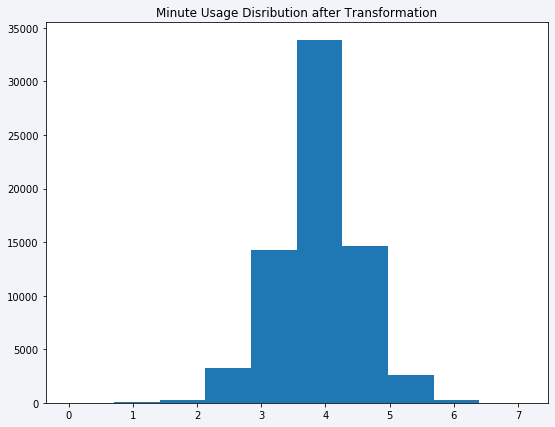

In [51]:
#Revenue Distribution after transformation
plt.figure(figsize=(9,7),facecolor="#f2f4f9")
plt.hist(data.revenue)
plt.title("Minute Usage Disribution after Transformation")
plt.show()

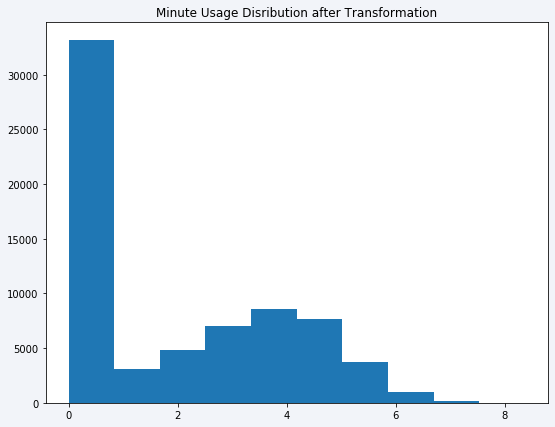

In [52]:
#Distribution of average minutes after transformation
plt.figure(figsize=(9,7),facecolor="#f2f4f9")
plt.hist(data.overage)
plt.title("Minute Usage Disribution after Transformation")
plt.show()

# Dividing Data into Train-Test Splits

Two different methods will be applied to divide the data for model construction. One of the variables CALIBRAT already train-test the dataset for model construction which will be applied first. It will be compared with the model performance of the model done on random train-test splitting afterwards.

In [53]:
y_train=data[['churn']][data['calibrat']==0]
y_test=data[['churn']][data['calibrat']==1]

In [54]:
x_train=data.drop("churn",axis=1)[data['calibrat']==0]
x_test=data.drop("churn",axis=1)[data['calibrat']==1]

In [55]:
x_train=x_train.drop("calibrat",axis=1)
x_test=x_test.drop("calibrat",axis=1)

In [56]:
Y=data.churn
X=data.drop("churn",axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [57]:
pd.pivot_table(data,index=["calibrat"],values=["churn"],aggfunc=[len],margins=True)

,len
,churn
calibrat,
0,30313
1,38886
All,69199


In [58]:
pd.crosstab(data['churn'],data['calibrat']).apply(lambda c: c/c.sum()*100,axis=0).round(1)

calibrat,0,1
churn,,
0,98.1,50.2
1,1.9,49.8


As it can be shown above, the test set of calibrat has an qual proportion of churned and retained customers (50/50).

# Models devloped on CALIBRAT train-test splits

# Model Construction 1: Logistic Regression

In [42]:
model_log1=LogisticRegression(penalty="l1",C=0.05,class_weight="balanced",random_state=42).fit(x_train,y_train)
print("roc_auc_train=",roc_auc_score(y_train,model_log1.predict(x_train)))
print("roc_auc_test=",roc_auc_score(y_test,model_log1.predict(x_test)))
print("recall_train=",recall_score(y_train,model_log1.predict(x_train)))
print("recall_test=",recall_score(y_test,model_log1.predict(x_test)))
print("accuracy train=",model_log1.score(x_train,y_train)) 
print("accuracy test=",model_log1.score(x_test,y_test))

C:\Users\shelu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shelu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


roc_auc_train= 0.6132917368183783
roc_auc_test= 0.5804403668189998
recall_train= 0.6273504273504273
recall_test= 0.5728957010889199
accuracy train= 0.5997756738033188
accuracy test= 0.5804659774726123


In [40]:
#Finding the most optimal parameters through GridSearch
gridsearch=GridSearchCV(LogisticRegression(random_state=42,class_weight="balanced"),param_grid={
                        'penalty':["l1","l2"],'C':(0.1,0.2,0.5)},cv=3,scoring="roc_auc",n_jobs=-1).fit(x_train,y_train)
print("Best parameters:",gridsearch.best_params_)
print("mean roc_auc score:",gridsearch.best_score_)

C:\Users\shelu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shelu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters: {'C': 0.1, 'penalty': 'l2'}
mean roc_auc score: 0.5985613044595673


In [43]:
#Constructing the model with the optimized parameters
model_log2=LogisticRegression(penalty="l2",C=0.1,class_weight="balanced",random_state=42).fit(x_train,y_train)
print("roc_auc_train=",roc_auc_score(y_train,model_log2.predict(x_train)))
print("roc_auc_test=",roc_auc_score(y_test,model_log2.predict(x_test)))
print("recall_train=",recall_score(y_train,model_log2.predict(x_train)))
print("recall_test=",recall_score(y_test,model_log2.predict(x_test)))
print("accuracy train=",model_log2.score(x_train,y_train)) 
print("accuracy test=",model_log2.score(x_test,y_test))

C:\Users\shelu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shelu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


roc_auc_train= 0.6185208569089086
roc_auc_test= 0.5775543581613867
recall_train= 0.6376068376068376
recall_test= 0.568302626825618
accuracy train= 0.6001715435621681
accuracy test= 0.577585763513861


# Model 2. Decision Tree Modeling

In [45]:
#Constructing DT
model1_dt=DecisionTreeClassifier(class_weight="balanced", max_depth=6, 
                             random_state=42).fit(x_train,y_train)
print("roc_auc:",roc_auc_score(y_train,model1_dt.predict(x_train)),
                  roc_auc_score(y_test,model1_dt.predict(x_test)))
print("recall",recall_score(y_train,model1_dt.predict(x_train)),
            recall_score(y_test,model1_dt.predict(x_test)))
print("accuracy",model1_dt.score(x_train,y_train),
      model1_dt.score(x_test,y_test))

roc_auc: 0.6772913446588097 0.5479626907461601
recall 0.8034188034188035 0.5561232388914693
accuracy 0.5560320654504668 0.5479349894563597


In [46]:
#let's get optimal parameters in specified ranges
gridsearch2=GridSearchCV(DecisionTreeClassifier(random_state=42,class_weight="balanced"),param_grid={
                        'max_depth':range(3,15),
                    },cv=3,scoring="roc_auc",n_jobs=-1).fit(x_train,y_train)
print("Best parameters:",gridsearch2.best_params_)

#the mean roc_auc score for train data based on gridsearchcv results
print("mean roc_auc score:",gridsearch2.best_score_)

Best parameters: {'max_depth': 4}
mean roc_auc score: 0.5598407711112624


In [52]:
#Constructing DT with optimal parameters
model2_dt=DecisionTreeClassifier(class_weight="balanced", max_depth=4, 
                             random_state=42).fit(x_train,y_train)
print("roc_auc:",roc_auc_score(y_train,model2_dt.predict(x_train)),
                  roc_auc_score(y_test,model2_dt.predict(x_test)))
print("recall",recall_score(y_train,model2_dt.predict(x_train)),
            recall_score(y_test,model2_dt.predict(x_test)))
print("accuracy",model2_dt.score(x_train,y_train),
      model2_dt.score(x_test,y_test))

roc_auc: 0.6306419514136146 0.5704686927358175
recall 0.7247863247863248 0.6102079785312484
accuracy 0.5401312968033517 0.5703337962248625


In [54]:
#lets get feature importances
feature_imp=pd.DataFrame(model2_dt.feature_importances_,index=x_test.columns,columns=["Feature Importances"])
feature_imp.sort_values(by="Feature Importances",ascending=False)

,Feature Importances
eqpdays,0.403682
months,0.115220
recchrge,0.108649
changem,0.079360
mou,0.059942
refurb,0.054973
overage,0.048754
marryun,0.044722
custcare,0.042385
age1,0.042313


# Model 3. Optimized Random Forest

In [310]:
#Geting optimal parameters in specified ranges
gridsearch4=GridSearchCV(RandomForestClassifier(random_state=42,class_weight="balanced"),param_grid={
                        'max_depth':range(3,20),'min_samples_leaf':(50,70,100,200,300,400),'n_estimators':(5,10,15,20,25,30)
                    },cv=3,scoring="roc_auc",n_jobs=-1).fit(x_train,y_train)
print("Best parameters:",gridsearch4.best_params_)

#the mean roc_auc score for train data based on gridsearchcv results
print("mean roc_auc score:",gridsearch4.best_score_)

Best parameters: {'max_depth': 15, 'min_samples_leaf': 50, 'n_estimators': 30}
mean roc_auc score: 0.663634407482201


In [55]:
#Constructing DT with the best parameters 2
model1_f=RandomForestClassifier(class_weight="balanced", max_depth=15,min_samples_leaf=50,n_estimators=30,
                             random_state=42).fit(x_train,y_train)
print("roc_auc:",roc_auc_score(y_train,model1_f.predict(x_train)),
                  roc_auc_score(y_test,model1_f.predict(x_test)))
print("recall",recall_score(y_train,model1_f.predict(x_train)),
            recall_score(y_test,model1_f.predict(x_test)))
print("accuracy",model1_f.score(x_train,y_train),
      model1_f.score(x_test,y_test))

C:\Users\shelu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


roc_auc: 0.8625732567874657 0.519234265786127
recall 0.7555555555555555 0.07183774578108067
accuracy 0.9654603635403952 0.5207529702206449


In [73]:
model2_f=RandomForestClassifier(class_weight="balanced", max_depth=2,n_estimators=50,
                             random_state=42).fit(x_train,y_train)
print("roc_auc:",roc_auc_score(y_train,model2_f.predict(x_train)),
                  roc_auc_score(y_test,model2_f.predict(x_test)))
print("recall",recall_score(y_train,model2_f.predict(x_train)),
            recall_score(y_test,model2_f.predict(x_test)))
print("accuracy",model2_f.score(x_train,y_train),
      model2_f.score(x_test,y_test))

C:\Users\shelu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


roc_auc: 0.6041480649627851 0.5819142579209515
recall 0.6427350427350428 0.59947360272488
accuracy 0.5670504404051068 0.5818546520598673


In [74]:
model3_f=RandomForestClassifier(class_weight="balanced", max_depth=3,n_estimators=70,
                             random_state=42).fit(x_train,y_train)
print("roc_auc:",roc_auc_score(y_train,model3_f.predict(x_train)),
                  roc_auc_score(y_test,model3_f.predict(x_test)))
print("recall",recall_score(y_train,model3_f.predict(x_train)),
            recall_score(y_test,model3_f.predict(x_test)))
print("accuracy",model3_f.score(x_train,y_train),
      model3_f.score(x_test,y_test))

C:\Users\shelu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


roc_auc: 0.6237376716991894 0.5783502599913175
recall 0.6547008547008547 0.5687154874335553
accuracy 0.5939695840068617 0.5783829655917296


# Model 4: Gradient Boosting

In [75]:
GB=GradientBoostingClassifier(random_state=42).fit(x_train,y_train)
print("roc_auc:",roc_auc_score(y_train,GB.predict(x_train)),
                  roc_auc_score(y_test,GB.predict(x_test)))
print("recall",recall_score(y_train,GB.predict(x_train)),
            recall_score(y_test,GB.predict(x_test)))
print("accuracy",GB.score(x_train,y_train),
      GB.score(x_test,y_test))

C:\Users\shelu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


roc_auc: 0.5427350427350427 0.5000849187862377
recall 0.08547008547008547 0.0023739484956391598
accuracy 0.9823508065846337 0.5017744175281592


# Models devloped on random train-test splits

In [84]:
Y=data.churn
X=data.drop("churn",axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [83]:
data=data.drop(["calibrat"], axis=1)

KeyError: "['calibrat'] not found in axis"

# Model 5: Logistic Regression

In [86]:
gridsearch=GridSearchCV(LogisticRegression(random_state=42,class_weight="balanced"),param_grid={
                        'penalty':["l1","l2"],'C':(0.1,0.2,0.5)},cv=3,scoring="roc_auc",n_jobs=-1).fit(x_train,y_train)
print("Best parameters:",gridsearch.best_params_)
print("mean roc_auc score:",gridsearch.best_score_)

C:\Users\shelu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best parameters: {'C': 0.5, 'penalty': 'l2'}
mean roc_auc score: 0.6251714691719562


In [89]:
#Constructing the model with the optimized parameters
model_log3=LogisticRegression(penalty="l2",C=0.5,class_weight="balanced",random_state=42).fit(x_train,y_train)
print("roc_auc_train=",roc_auc_score(y_train,model_log3.predict(x_train)))
print("roc_auc_test=",roc_auc_score(y_test,model_log3.predict(x_test)))
print("recall_train=",recall_score(y_train,model_log3.predict(x_train)))
print("recall_test=",recall_score(y_test,model_log3.predict(x_test)))
print("accuracy train=",model_log3.score(x_train,y_train)) 
print("accuracy test=",model_log3.score(x_test,y_test))

C:\Users\shelu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc_auc_train= 0.5904167882264779
roc_auc_test= 0.5866765579876733
recall_train= 0.5876316140210582
recall_test= 0.5788942695722357
accuracy train= 0.5915913601418139
accuracy test= 0.59


In [99]:
y_pred = model_log3.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', cm)

total1=sum(sum(cm))

#####from confusion matrix calculate accuracy
accuracy=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy)

sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity)

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity )

Confusion Matrix : 
 [[7338 5006]
 [2087 2869]]
Accuracy :  0.59
Sensitivity :  0.5788942695722357
Specificity :  0.5944588464031109


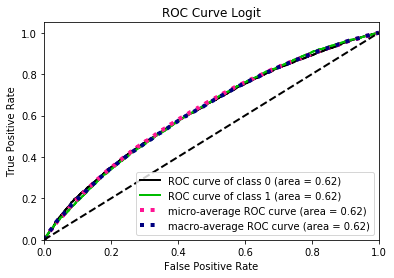

In [91]:
y_probas = model_log3.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, title="ROC Curve Logit")
plt.show()

# Model 6: Decision Tree Modeling

In [92]:
#let's get optimal parameters in specified ranges
gridsearch_log=GridSearchCV(DecisionTreeClassifier(random_state=42,class_weight="balanced"),param_grid={'max_depth':range(3,15), 'min_samples_leaf':(200,300,400,500)
                    },cv=2,scoring="roc_auc",n_jobs=-1).fit(x_train,y_train)
print("Best parameters:",gridsearch_log.best_params_)

#the mean roc_auc score for train data based on gridsearchcv results
print("mean roc_auc score:",gridsearch_log.best_score_)

Best parameters: {'max_depth': 11, 'min_samples_leaf': 400}
mean roc_auc score: 0.632459860938663


In [101]:
#Constructing DT with the best parameters 
model3_dt=DecisionTreeClassifier(class_weight='balanced', max_depth=11, min_samples_leaf= 400, 
                             random_state=42).fit(x_train,y_train)
print("roc_auc:",roc_auc_score(y_train,mode3_dt.predict(x_train)),
                  roc_auc_score(y_test,mode3_dt.predict(x_test)))
print("recall",recall_score(y_train,mode3_dt.predict(x_train)),
            recall_score(y_test,mode3_dt.predict(x_test)))
print("accuracy",mode3_dt.score(x_train,y_train),
      mode3_dt.score(x_test,y_test))

roc_auc: 0.6165740789039329 0.6014947088494108
recall 0.6261495401839264 0.604317998385795
accuracy 0.6125358870113105 0.6002890173410405


In [98]:
y_pred2 = mode3_dt.predict(x_test)
cm2 = confusion_matrix(y_test,y_pred2)
print('Confusion Matrix : \n', cm2)

total1=sum(sum(cm2))

#####from confusion matrix calculate accuracy
accuracy2=(cm2[0,0]+cm2[1,1])/total1
print ('Accuracy : ', accuracy2)

sensitivity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Sensitivity : ', sensitivity2)

specificity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Specificity : ', specificity2 )

Confusion Matrix : 
 [[7390 4954]
 [1961 2995]]
Accuracy :  0.6002890173410405
Sensitivity :  0.604317998385795
Specificity :  0.5986714193130266


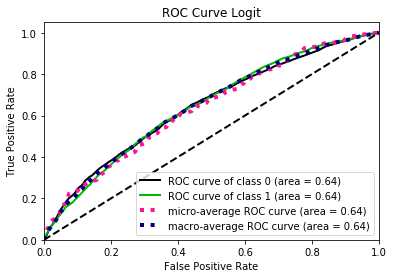

In [102]:
y_probas2 = model3_dt.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas2, title="ROC Curve Logit")
plt.show()

# Model 7: Random Forest

In [282]:
gridsearch_log3=GridSearchCV(RandomForestClassifier(random_state=42),param_grid={"class_weight":[None,"balanced"],
                        'max_depth':range(3,15),'min_samples_leaf':(80,150),'n_estimators':(50,150,350)
                    },cv=3,scoring="roc_auc",n_jobs=-1).fit(x_train,y_train)
print("Best parameters:",gridsearch_log3.best_params_)

#the mean roc_auc score for train data based on gridsearchcv results
print("mean roc_auc score:",gridsearch_log3.best_score_)

Best parameters: {'class_weight': None, 'max_depth': 14, 'min_samples_leaf': 80, 'n_estimators': 350}
mean roc_auc score: 0.6632020034504459


In [283]:
forest_log2=RandomForestClassifier(class_weight='balanced', max_depth=14, min_samples_leaf= 80, n_estimators=350,
                             random_state=42).fit(x_train,y_train)
print("roc_auc:",roc_auc_score(y_train,forest_log2.predict(x_train)),
                  roc_auc_score(y_test,forest_log2.predict(x_test)))
print("recall",recall_score(y_train,forest_log2.predict(x_train)),
            recall_score(y_test,forest_log2.predict(x_test)))
print("accuracy",forest_log2.score(x_train,y_train),
      forest_log2.score(x_test,y_test))

roc_auc: 0.6639175632968712 0.6216624193466549
recall 0.7063974864629988 0.6496815286624203
accuracy 0.6458886451960445 0.6098926468890684


In [107]:
feature_imp_log=pd.DataFrame(forest_log6.feature_importances_,index=X.columns,columns=["Feature Importances"])
feature_imp_log.sort_values(by="Feature Importances",ascending=False)

,Feature Importances
eqpdays,0.234207
months,0.188397
mou,0.068913
changem,0.067094
recchrge,0.051048
changer,0.028503
overage,0.028395
retcalls,0.026170
revenue,0.024719
age1,0.023628


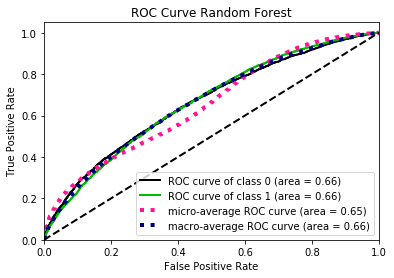

In [340]:
y_probas = forest_log6.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, title="ROC Curve Random Forest")
plt.show()

In [105]:
y_pred3 = forest_log6.predict(x_test)
cm3 = confusion_matrix(y_test,y_pred3)
print('Confusion Matrix : \n', cm3)

total1=sum(sum(cm3))

#####from confusion matrix calculate accuracy
accuracy3=(cm3[0,0]+cm3[1,1])/total1
print ('Accuracy : ', accuracy)

sensitivity3 = cm3[1,1]/(cm3[1,0]+cm3[1,1])
print('Sensitivity : ', sensitivity3)

specificity3 = cm3[0,0]/(cm[0,0]+cm3[0,1])
print('Specificity : ', specificity3 )

Confusion Matrix : 
 [[6529 5815]
 [1516 3440]]
Accuracy :  0.59
Sensitivity :  0.6941081517352704
Specificity :  0.49638865658024783


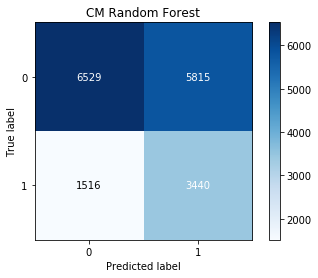

In [345]:
y_pred = forest_log6.predict(x_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, title="CM Random Forest")

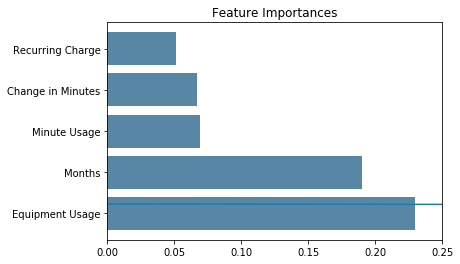

In [141]:
feat=(0.23,0.19,0.069,0.067,0.051)
featn = ('Equipment Usage', 'Months', 'Minute Usage', 'Change in Minutes', 'Recurring Charge')
plt.barh(featn, feat,color="#5886a5")
plt.xlim(0,0.25)
plt.title("Feature Importances")
#draw plot
plt.plot(feat)

# Gain, Lift chart

C:\Users\shelu\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


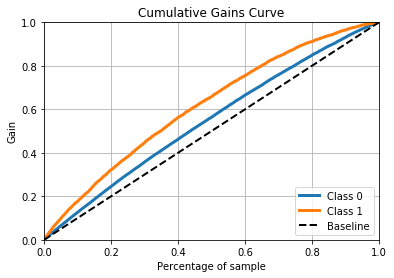

In [45]:
skplt.metrics.plot_cumulative_gain(y_test,forest_log6.predict_proba(x_test))

C:\Users\shelu\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


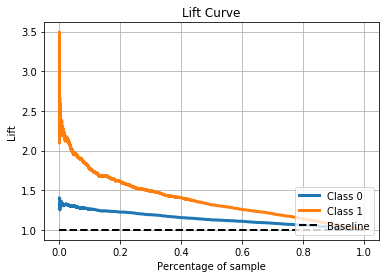

In [46]:
skplt.metrics.plot_lift_curve(y_test,forest_log6.predict_proba(x_test))

In [69]:
data[data['retaccpt']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1114 entries, 11 to 71020
Data columns (total 41 columns):
churn       1114 non-null int64
revenue     1114 non-null float64
mou         1114 non-null float64
recchrge    1114 non-null float64
overage     1114 non-null float64
roam        1114 non-null float64
changem     1114 non-null float64
changer     1114 non-null float64
dropvce     1114 non-null float64
unansvce    1114 non-null float64
custcare    1114 non-null float64
threeway    1114 non-null float64
outcalls    1114 non-null float64
incalls     1114 non-null float64
opeakvce    1114 non-null float64
dropblk     1114 non-null float64
callfwdv    1114 non-null float64
callwait    1114 non-null float64
months      1114 non-null float64
uniqsubs    1114 non-null int64
models      1114 non-null float64
eqpdays     1114 non-null float64
age1        1114 non-null float64
children    1114 non-null int64
creditaa    1114 non-null int64
prizmrur    1114 non-null int64
prizmub     1114 

# Comparing Different Models (random splitting)

In [109]:
models={"Logistic Regression": model_log3,
        "Decision Tree": model3_dt, 
        "Random Forest": forest_log6,
        "GradientBoosting":GB}
scores={"Accuracy":accuracy_score,
        "ROC AUC":roc_auc_score,
       "Recall":recall_score}

In [110]:
#let's use for loop to fit models and print metrics for each model
for model_name, model in models.items():
    print("\n",model_name)
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    for score_name, score in scores.items():
        print(score_name,score(y_test,prediction).round(2)*100)


 Logistic Regression


C:\Users\shelu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy 59.0
ROC AUC 59.0
Recall 57.99999999999999

 Decision Tree
Accuracy 60.0
ROC AUC 60.0
Recall 60.0

 Random Forest
Accuracy 57.99999999999999
ROC AUC 61.0
Recall 69.0

 GradientBoosting
Accuracy 72.0
ROC AUC 53.0
Recall 7.000000000000001


# Comparing Different Models (calibrat splitting)

In [111]:
#Calibrat models
models2={"Logistic Regression": model_log2,
        "Decision Tree": model2_dt, 
        "Random Forest": model2_f,
        "GradientBoosting":GB}
scores2={"Accuracy":accuracy_score,
        "ROC AUC":roc_auc_score,
       "Recall":recall_score}

In [112]:
#Calibrtat scores
for model_name, model in models2.items():
    print("\n",model_name)
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    for score_name, score in scores2.items():
        print(score_name,score(y_test,prediction).round(2)*100)


 Logistic Regression


C:\Users\shelu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy 59.0
ROC AUC 59.0
Recall 57.99999999999999

 Decision Tree
Accuracy 50.0
ROC AUC 59.0
Recall 80.0

 Random Forest
Accuracy 55.00000000000001
ROC AUC 59.0
Recall 69.0

 GradientBoosting
Accuracy 72.0
ROC AUC 53.0
Recall 7.000000000000001
